In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
# Helper libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

Loading The dataset

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


Checking the size of training and testing data

In [ ]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

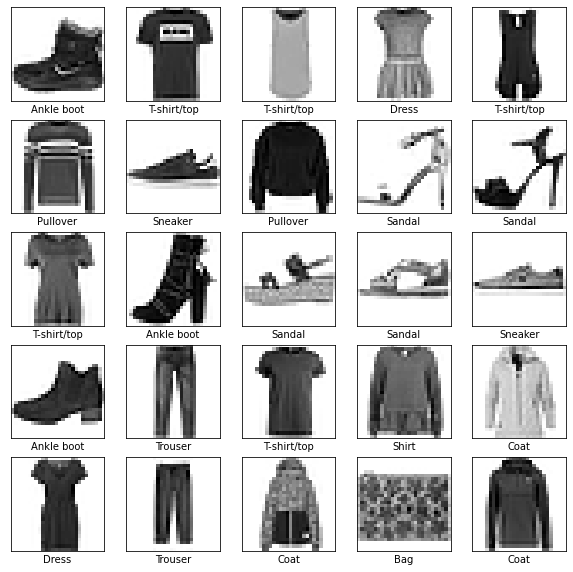

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
#Defining a function to rotate the images by 30 degress
def rotation(input):
  height, width = input.shape[:2]
  rotate_matrix = cv2.getRotationMatrix2D(center=(width/2,height/2), angle=30, scale=1)
  rotated_image = cv2.warpAffine(src=input, M=rotate_matrix, dsize=(width, height))
  return rotated_image

In [ ]:
#Rotated training images are saved 
rotated_train=[]
for i in range(len(train_images)):
  x=rotation(train_images[i])
  rotated_train.append(x)

rotated_train=np.asarray(rotated_train)


Viewing first 25 images after rotation operation

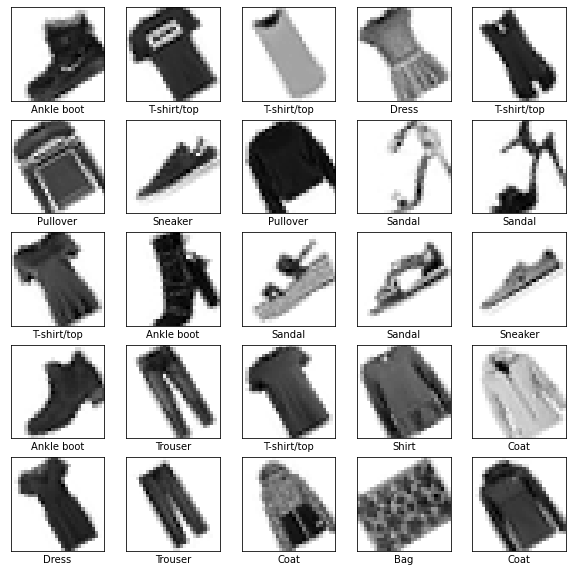

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(rotated_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
#Rotated test images are saved
rotated_test=[]
for i in range(len(test_images)):
  x=rotation(test_images[i])
  rotated_test.append(x)

rotated_test=np.asarray(rotated_test)

In [ ]:
#Defining a function for Affine transformation, which provides shearing effect to the images

def affine(input):
  num_rows, num_cols = input.shape[:2]
  src_points = np.float32([[0,0], [num_cols-1,0], [0,num_rows-1]])
  dst_points = np.float32([[0,0], [int(0.6*(num_cols-1)),0], [int(0.4*(num_cols-1)),num_rows-1]])
  matrix = cv2.getAffineTransform(src_points, dst_points)
  img_afftran = cv2.warpAffine(input, matrix, (num_cols,num_rows))
  return img_afftran

In [ ]:
#Applied Affine transformation on Rootated Training and Test dataset
affined_train=[]
for i in rotated_train:
  affined_train.append(affine(i))
affined_train=np.asarray(affined_train)

affined_test=[]
for i in rotated_test:
  affined_test.append(affine(i))

affined_test=np.asarray(affined_test)

In [ ]:
##Normalizing RGB values
affined_train=affined_train/255
affined_test=affined_test/255

Viewing first 25 images after affine transformation

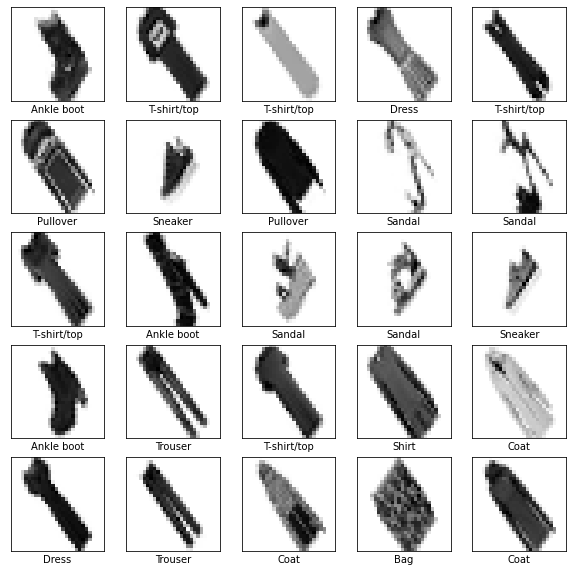

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(affined_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
#reshaping the data
affined_train=affined_train.reshape(60000,28,28,1)
affined_test=affined_test.reshape(10000,28,28,1)

**Part 2**
Buiding the CNN model

In [ ]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu",input_shape=(28, 28,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

Compiling the Model

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

Training the model

In [ ]:
model_log=model.fit(affined_train, train_labels, epochs=15,validation_data=(affined_test,test_labels))

Epoch 1/15
1875/1875 [==============================] - 43s 6ms/step - loss: 0.4330 - accuracy: 0.8442 - val_loss: 0.3914 - val_accuracy: 0.8608
Epoch 2/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3278 - accuracy: 0.8784 - val_loss: 0.3825 - val_accuracy: 0.8531
Epoch 3/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2963 - accuracy: 0.8911 - val_loss: 0.3725 - val_accuracy: 0.8735
Epoch 4/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2758 - accuracy: 0.8963 - val_loss: 0.3440 - val_accuracy: 0.8802
Epoch 5/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2654 - accuracy: 0.9022 - val_loss: 0.4319 - val_accuracy: 0.8654
Epoch 6/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2524 - accuracy: 0.9067 - val_loss: 0.4237 - val_accuracy: 0.8701
Epoch 7/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2419 - accuracy: 0.9104 - val_loss: 0.4095 - val_ac

From observing the validation accuracy we can see that, from epoch 5 the accuracy starts to fluctuate, so next time we used Early stopping.

**part 3**
Building the model with dropout and BatchNormalization

In [ ]:
model1=tf.keras.Sequential()
model1.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu",input_shape=(28, 28,1)))
model1.add(tf.keras.layers.BatchNormalization(momentum=0.2))
model1.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(256, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.2))
model1.add(tf.keras.layers.Dense(10,activation='softmax'))


Compiling the model

In [ ]:
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

Training the model with EarlyStopping as callback

In [ ]:
model1_log=model1.fit(affined_train, train_labels, epochs=15,callbacks=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=3, 
    min_delta=0.001, 
    mode='auto'
),validation_data=(affined_test,test_labels))

Epoch 1/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.7086 - accuracy: 0.7898 - val_loss: 0.5601 - val_accuracy: 0.7810
Epoch 2/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5135 - accuracy: 0.8178 - val_loss: 0.5117 - val_accuracy: 0.8271
Epoch 3/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5715 - accuracy: 0.8084 - val_loss: 0.4497 - val_accuracy: 0.8500
Epoch 4/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5393 - accuracy: 0.8149 - val_loss: 0.4954 - val_accuracy: 0.8404
Epoch 5/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5436 - accuracy: 0.8171 - val_loss: 0.4653 - val_accuracy: 0.8561
Epoch 6/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5465 - accuracy: 0.8225 - val_loss: 0.4151 - val_accuracy: 0.8625
Epoch 7/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5406 - accuracy: 0.8222 - val_loss: 0.5696 - val_ac

The model has stopped training as the validation loss was increasing for 3 epochs 

In [ ]:
model2=tf.keras.Sequential()
model2.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu",input_shape=(28, 28,1)))
model2.add(tf.keras.layers.BatchNormalization(momentum=0.2))
model2.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(256, activation='relu')) 
model2.add(tf.keras.layers.Dropout(0.2))
model2.add(tf.keras.layers.Dense(10,activation='softmax'))

Compiling The model

In [ ]:
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

Training the model with ReduceLROnPlateau as callback

In [ ]:
model2_log=model2.fit(affined_train, train_labels, epochs=15,callbacks=tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.2,   
    patience=2, 
    min_lr=0.0001,
    verbose=2
),validation_data=(affined_test,test_labels))

Epoch 1/15
1875/1875 [==============================] - 114s 61ms/step - loss: 0.6773 - accuracy: 0.7956 - val_loss: 0.4404 - val_accuracy: 0.8410
Epoch 2/15
1875/1875 [==============================] - 112s 60ms/step - loss: 0.5263 - accuracy: 0.8192 - val_loss: 0.5212 - val_accuracy: 0.8183
Epoch 3/15
1875/1875 [==============================] - 111s 59ms/step - loss: 0.5073 - accuracy: 0.8251 - val_loss: 0.5649 - val_accuracy: 0.8312

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0019999999552965165.
Epoch 4/15
1875/1875 [==============================] - 110s 59ms/step - loss: 0.3545 - accuracy: 0.8706 - val_loss: 0.3569 - val_accuracy: 0.8717
Epoch 5/15
1875/1875 [==============================] - 110s 59ms/step - loss: 0.3259 - accuracy: 0.8793 - val_loss: 0.3447 - val_accuracy: 0.8761
Epoch 6/15
1875/1875 [==============================] - 107s 57ms/step - loss: 0.3140 - accuracy: 0.8830 - val_loss: 0.3438 - val_accuracy: 0.8815
Epoch 7/15
1875/1875 [===============

The model is changing learning to minimize the val_loss and maximize accuracy.




COMPARISON BETWEEN MODELS

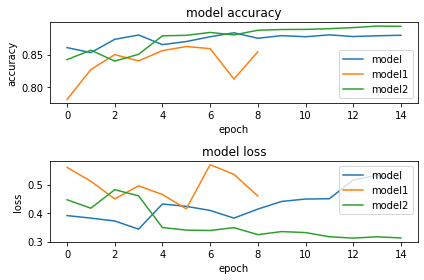

In [ ]:
import os
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['val_accuracy'])
plt.plot(model1_log.history['val_accuracy'])
plt.plot(model2_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['model', 'model1','model2'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_log.history['val_loss'])
plt.plot(model1_log.history['val_loss'])
plt.plot(model2_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['model', 'model1','model2'], loc='upper right')
plt.tight_layout()


From the above plots we can see that model2 has the highest validation accuracy as well as lowest validation loss.


Saving model2

In [ ]:
model2.save("model2.h5")

Loading the saved model

In [ ]:
from keras.models import load_model
new_model = load_model('model2.h5')

Making predictions using loaded model

In [ ]:
predictions = new_model.predict(affined_test)

In [ ]:
preds=[]
for i in range(len(affined_test)):
  preds.append(np.argmax(predictions[i]))

In [ ]:
preds=np.asarray(preds)

Visualizing the predictions

In [ ]:
from google.colab.patches import cv2_imshow
for i in range (20):
  cv2_imshow(affined_test[i]*255)
  print("Predicted label -",class_names[preds[i]])
  print("Actual label -",class_names[test_labels[i]])

Predicted label - Ankle boot
Actual label - Ankle boot


Predicted label - Pullover
Actual label - Pullover


Predicted label - Trouser
Actual label - Trouser


Predicted label - Trouser
Actual label - Trouser


Predicted label - Shirt
Actual label - Shirt


Predicted label - Trouser
Actual label - Trouser


Predicted label - Coat
Actual label - Coat


Predicted label - Shirt
Actual label - Shirt


Predicted label - Sandal
Actual label - Sandal


Predicted label - Sneaker
Actual label - Sneaker


Predicted label - Coat
Actual label - Coat


Predicted label - Sandal
Actual label - Sandal


Predicted label - Bag
Actual label - Sneaker


Predicted label - Dress
Actual label - Dress


Predicted label - Coat
Actual label - Coat


Predicted label - Trouser
Actual label - Trouser


Predicted label - Pullover
Actual label - Pullover


Predicted label - Coat
Actual label - Coat


Predicted label - Bag
Actual label - Bag


Predicted label - T-shirt/top
Actual label - T-shirt/top
